In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
dataset= pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset.iloc[:, 1:2]
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [22]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler#

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
X_train=[]
Y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train,Y_train = np.array(X_train), np.array(Y_train)
#reshape array
X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [24]:
from keras.models import Sequential
from  keras.layers import Dense ,LSTM , Dropout

In [25]:
regressor = Sequential()

In [26]:
#add lstm layers and dropout regularization
regressor.add(LSTM(units=50, return_sequences=True , input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units=50, return_sequences=True  ))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units=50, return_sequences=True  ))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(LSTM(units=50  ))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(Dense(units=1))#output layer

In [31]:
#compile rnn
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

In [33]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [37]:
dataset_total= pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs =inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i , 0])

X_test = np.array(X_test)
X_test =  np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
 

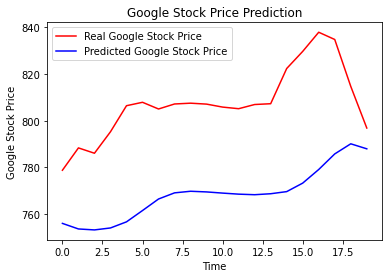

In [38]:
#lets visualize the results of predicted and real stock price
plt.plot(real_stock_price, color='r', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='b', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
